<a href="https://colab.research.google.com/github/arlou022/Brand-Classification-Project/blob/main/TF2_0_TL_with_Data_Augmentation_Adidas_or_Nike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we'll be implementing Transfer Learning towards building a model to be able to classify between Nike and Adidas shoes. The dataset can be found from: https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset .



In [ ]:
# Upload dataset

from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: labelnames.csv          
  inflating: test/adidas/Adidas (18).jpg  
  inflating: test/adidas/Adidas (19).jpg  
  inflating: test/adidas/Adidas (20).jpg  
  inflating: test/adidas/Adidas (21).JPG  
  inflating: test/adidas/Adidas (22).jpg  
  inflating: test/adidas/Adidas (23).jpg  
  inflating: test/adidas/Adidas (24).jpg  
  inflating: test/adidas/Adidas (25).jpg  
  inflating: test/adidas/Adidas (26).jpg  
  inflating: test/adidas/Adidas (27).jpg  
  inflating: test/adidas/aadidas_ (10).jpg  
  inflating: test/adidas/aadidas_ (11).jpg  
  inflating: test/adidas/aadidas_ (12).jpg  
  inflating: test/adidas/aadidas_ (13).jpg  
  inflating: test/adidas/aadidas_ (14).jpg  
  inflating: test/adidas/aadidas_ (15).jpg  
  inflating: test/adidas/aadidas_ (16).jpg  
  inflating: test/adidas/aadidas_ (17).jpg  
  inflating: test/adidas/aadidas_ (18).jpg  
  inflating: test/adidas/aadidas_ (19).jpg  
  inflating: test/adidas/aadidas_ (2).jpg  
  inflating: tes

In [ ]:
# Usual imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# Imports for TL and Data Augmentation
# Code adapted from TF2.0 course.

from tensorflow.keras.applications.vgg16 import VGG16 as PreTrainedModel
from tensorflow.keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.applications.inception_v3 import InceptionV3 as PreTrainedModel
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

So we need all data to be saved under 1 folder. Within this folder are 2 folders containing the training and validation data and within the training and validation folders are folders for each class, in this case 2 folders in each, one nike folder and the other adidas.

For the notebook in the course, we had to create the folders in the way we needed, for this dataset, we already have everything how we'd like (for training).

Also decided to go with vgg model rather than the inception model as the inception model was too complex which made running it slow and hence hindered the whole pupose of this notebook which is to experiment and learn.

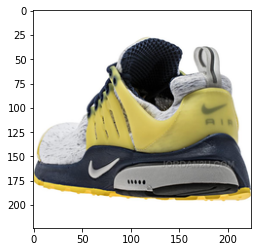

In [ ]:
# Load image

plt.imshow(image.load_img('/content/train/nike/Image_101.jpg'))

Prestos, nice.

In [ ]:
# Convenient to define

train_path = '/content/train'
valid_path = '/content/validation'

In [ ]:
from glob import glob

# Convenient to define number of image files

train_image_files = glob(train_path + '/*/*.jpg')

# Glob code adapted from course
# Glob adapting motivation: https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/
# Basically my simple understanding is that it's a pattern finder, this line of code is basically
# finding the number of elements with such a string path /content/train/nike_or_adidas/Whatever_is_before_the_.jpg

In [ ]:
#type(train_image_files)

In [ ]:
#len(train_image_files)

In [ ]:
# Convenient to define number of image files

valid_image_files = glob(valid_path + '/*/*.jpg')

In [ ]:
#type(valid_image_files)

In [ ]:
#len(valid_image_files)

In [ ]:
#valid_image_files

In [ ]:
# Convenient to define number of classes

folders = glob(train_path + '/*')

In [ ]:
#len(folders)

In [ ]:
#folders

In [ ]:
# Convenient to define desired image size
# as the functions we'll use will convert the input iage
# into our desired image size

Image_size = [200, 200]

In [ ]:
#type(Image_size)

In [ ]:
# instantiate pre-trained model

ptm = PreTrainedModel(
    input_shape = Image_size + [3], # images have color so +3 to account for color
    weights = 'imagenet',
    include_top = False # Create our own top
)

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Freeze pre-trained model weights

ptm.trainable = False

In [ ]:
#ptm.summary()

In [ ]:
K = len(folders)

x = Flatten() (ptm.output) # Input to dense layer in (N,D) so we flatten ptm output so we can pass into dense layer
x = Dense(K, activation = 'softmax') (x) 
model = Model(inputs=ptm.input, outputs = x)
# # Keras image data generator returns classes one-hot encoded
# hence softmax not sigmoid even thought binary classifcation problem.
# Essentially out target is an N x K target matrix rather than full of 0's and 1's

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
# Specify Augmentations

train_gen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    preprocessing_function = preprocess_input
)

valid_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [ ]:
# create generators, i.e. objects which will generate the augmented images when called

batch_size=20

train_generator = train_gen.flow_from_directory(
  train_path,
  shuffle=True,
  target_size=Image_size,
  batch_size=batch_size,
  #color_mode = 'rgba'
)
valid_generator = valid_gen.flow_from_directory(
  valid_path,
  target_size=Image_size,
  batch_size=batch_size,
 # color_mode = 'rgba'
)

Found 460 images belonging to 2 classes.
Found 55 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
    train_generator,
    validation_data = valid_generator,
    epochs = 2,
    steps_per_epoch = int(np.ceil(len(train_image_files)/batch_size)),
    validation_steps = int(np.ceil(len(valid_image_files)/batch_size))
)

<ipython-input-27-1d4b850de4d4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/2
14/22 [==================>...........] - ETA: 1:21 - loss: 7.5665 - accuracy: 0.6393

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 [==============================] - 263s 12s/step - loss: 6.8054 - accuracy: 0.6727 - val_loss: 6.3498 - val_accuracy: 0.7273
Epoch 2/2
22/22 [==============================] - 254s 12s/step - loss: 4.4487 - accuracy: 0.7864 - val_loss: 9.7342 - val_accuracy: 0.8182


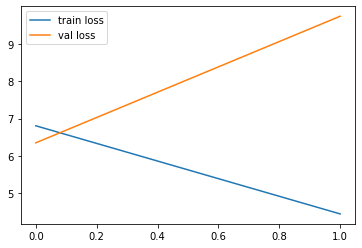

In [ ]:
# plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

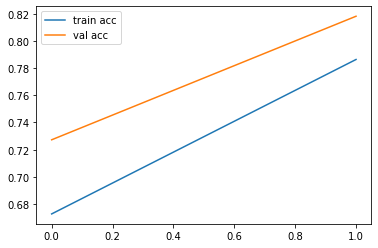

In [ ]:
# plot accuracy

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

So we know targets are one-hot encoded. I want to identify how they're indexed. 

Found out from documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory 

So from my understanding, if the 'classes' argument is not specified in the flow_from_directory function, the classes are inferred from the structure of the subdirectories where each subdirectory is treated as a class. I.e. the subdirectories of the train directory are ordered adidas and nike, so adidas takes the first index and nike takes the second. Also, the same order applies to the valid and test directories.

In [ ]:
train_generator.class_indices

{'adidas': 0, 'nike': 1}

In [ ]:
valid_generator.class_indices

{'adidas': 0, 'nike': 1}

# Evaluation

In [ ]:
eval_path = '/content/test'

eval_image_files = glob(eval_path + '/*/*.jpg') + glob(eval_path + '/*/*.JPG')
print(len(eval_image_files))

eval_gen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

eval_generator = eval_gen.flow_from_directory(
  eval_path,
  target_size=Image_size,
  batch_size=1,
 # color_mode = 'rgba'
)

60
Found 60 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(eval_generator, 
                        steps = int(np.ceil(len(eval_image_files)))
                        )

<ipython-input-35-6bf07a38f099>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(eval_generator,


[5.929275035858154, 0.7333333492279053]

73% accurate.... not the best, but overall happy with what I've learnt and observed through experimentation.